# For connecting and retrieving query results from MYSQL

In [1]:
# pip install mysql-connector-python

In [2]:
import mysql.connector
import pandas as pd

class mysqlconnector:
    
    def __init__(self, database = 'test'):
        try:
            connection = mysql.connector.connect(host = 'localhost',
                                                user = 'root',
                                                password = '',
                                                use_pure = True,
                                                database = database
                                                )
            if connection.is_connected:
                db_info = connection.get_server_info()
                print('connected to MYSQL server version', db_info)
                print('You are connected to the database:', database)
                self.connection = connection
        except Exception as e:
            print('Error while connecting to MYSQL', e)
            
    def execute(self, query, header = False):
        cursor = self.connection.cursor(buffered = True)
        cursor.execute(query)
        
        try:
            record = cursor.fetchall()
            if header:
                header = [i[0] for i in cursor.description]
                return {'header': header, 'record': record}
            else:
                return record
        except:
            pass
        
    def to_df(self, query):
        result = self.execute(query, header = True)
        df = pd.DataFrame(result['record'])
        df.columns = result['header']
        return df

In [3]:
db = mysqlconnector('bank')

connected to MYSQL server version 5.5.5-10.4.24-MariaDB
You are connected to the database: bank


In [7]:
query = 'SELECT * FROM Loan JOIN Account USING(account_id);'
df = db.to_df(query)

In [8]:
df.sample(10)

,account_id,loan_id,Loan_date,amount,duration,payments,status,district_id,frequency,Account_date
476,7099,6450,1998-06-10,234336,48,4882.00,C,1,POPLATEK MESICNE,1996-08-20
328,6678,6350,1997-07-09,294384,48,6133.00,C,54,POPLATEK MESICNE,1996-01-03
207,11186,7271,1996-10-02,392460,60,6541.00,C,12,POPLATEK MESICNE,1994-11-24
352,2753,5531,1997-09-30,66432,24,2768.00,C,26,POPLATEK MESICNE,1996-02-13
86,7485,6520,1994-03-16,91200,24,3800.00,A,39,POPLATEK MESICNE,1993-07-28
43,10973,7235,1993-10-13,154416,48,3217.00,A,18,POPLATEK TYDNE,1993-04-20
6,6473,6316,1994-05-26,76908,12,6409.00,B,12,POPLATEK MESICNE,1993-01-26
324,4462,5892,1996-05-14,66480,24,2770.00,B,73,POPLATEK TYDNE,1995-12-27
240,6397,6302,1996-09-16,181020,60,3017.00,C,48,POPLATEK MESICNE,1995-03-15
323,5477,6118,1997-10-04,349392,48,7279.00,C,57,POPLATEK MESICNE,1995-12-17


In [9]:
# df_good for food loans
df_good = df[df['status'].isin(['A','C'])]
df_good.shape

(606, 10)

In [10]:
# df_bad for bad loans
df_bad = df[df['status'].isin(['B', 'D'])]
df_bad.shape

(76, 10)

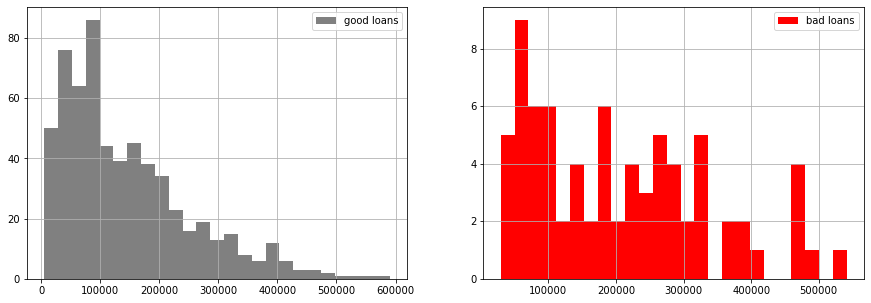

In [11]:
import matplotlib.pyplot as plt

# To plot histogram of the loan amount
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
df_good['amount'].hist(bins = 25, ax = ax1, label = 'good loans', color = 'grey')
df_bad['amount'].hist(bins =  25, ax = ax2, label = 'bad loans', color = 'red')

ax1.legend()
ax2.legend()

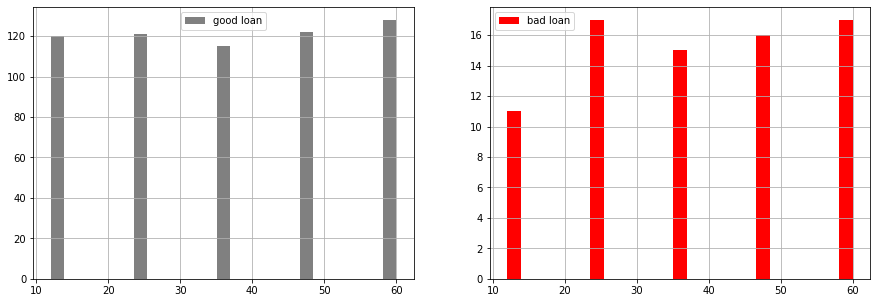

In [12]:
# To plot histogram of the loan duration

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
df_good['duration'].hist(ax = ax1, label = 'good loan', color = 'grey', bins = 25)
df_bad['duration'].hist(ax = ax2, label = 'bad loan', color = 'red', bins = 25)

ax1.legend(loc = 9)
ax2.legend()

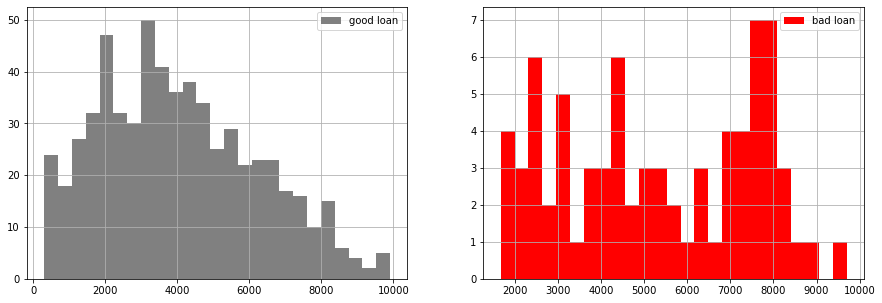

In [13]:
# To plot histogram of the loan monthly installment

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
df_good['payments'].hist(ax = ax1, label = 'good loan', color = 'grey', bins = 25)
df_bad['payments'].hist(ax = ax2, label = 'bad loan', color = 'red', bins = 25)

ax1.legend()
ax2.legend()

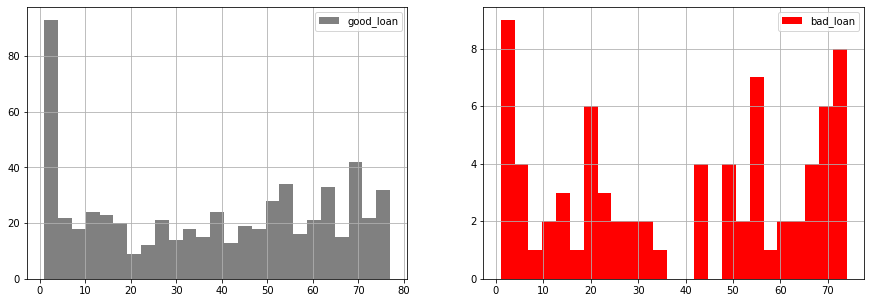

In [14]:
# To plot histogram of the loan location

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
df_good['district_id'].hist(ax = ax1, label = 'good_loan', color = 'grey', bins = 25)
df_bad['district_id'].hist(ax = ax2, label = 'bad_loan', color = 'red', bins = 25)

ax1.legend()
ax2.legend()

In [18]:
# To rename columns date column in Loan and Account tables

# No need to run rename commands as the columns name have been changed in the database

query = """ALTER TABLE Loan 
        CHANGE COLUMN `date` Loan_date DATE;"""

df1 = db.to_df(query)

ProgrammingError: 1054 (42S22): Unknown column 'date' in 'loan'

In [19]:
query = 'SELECT * FROM Loan;'

df1 = db.to_df(query)
df1.head()

,loan_id,account_id,Loan_date,amount,duration,payments,status
0,5314,1787,1993-07-05,96396,12,8033.00,B
1,5316,1801,1993-07-11,165960,36,4610.00,A
2,6863,9188,1993-07-28,127080,60,2118.00,A
3,5325,1843,1993-08-03,105804,36,2939.00,A
4,7240,11013,1993-09-06,274740,60,4579.00,A


In [20]:
query = 'ALTER TABLE Account CHANGE COLUMN `date` Account_date DATE;'
db.to_df(query)

ProgrammingError: 1054 (42S22): Unknown column 'date' in 'account'

In [21]:
query = 'SELECT * FROM Loan JOIN Account USING(account_id)'
df = db.to_df(query)
df.head()

,account_id,loan_id,Loan_date,amount,duration,payments,status,district_id,frequency,Account_date
0,5270,6077,1993-11-22,79608,24,3317.00,A,44,POPLATEK MESICNE,1993-01-13
1,11265,7284,1993-09-15,52788,12,4399.00,A,15,POPLATEK MESICNE,1993-01-14
2,10364,7121,1993-11-10,21924,36,609.00,A,55,POPLATEK MESICNE,1993-01-17
3,3834,5754,1994-09-28,23052,12,1921.00,A,54,POPLATEK MESICNE,1993-01-19
4,9307,6895,1994-09-19,41904,12,3492.00,A,68,POPLATEK MESICNE,1993-01-24


In [22]:
df1 = df.copy()
# df1.rename(columns = {'date': 'loan_dates'})
df1.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False])

In [23]:
# feature creation from date of account opening and date of applying loan (DID : Dfference In Dates)

df['DID'] = df['Loan_date'] - df['Account_date']
df_good = df[df['status'].isin(['A', 'C'])]
df_bad = df[df['status'].isin(['B', 'D'])]

In [24]:
# Converts timedelta64 to float64 as timedelta was not being able to use for plotting histogram
df_good['DID'].astype('timedelta64[D]')

0      313.0
1      244.0
2      297.0
3      617.0
4      603.0
       ...  
677    176.0
678    242.0
679    359.0
680    159.0
681    293.0
Name: DID, Length: 606, dtype: float64

In [25]:
# Another way of converting the timedelta64 to the int64 for plotting histogram
df_good['DID'].dt.days

0      313
1      244
2      297
3      617
4      603
      ... 
677    176
678    242
679    359
680    159
681    293
Name: DID, Length: 606, dtype: int64

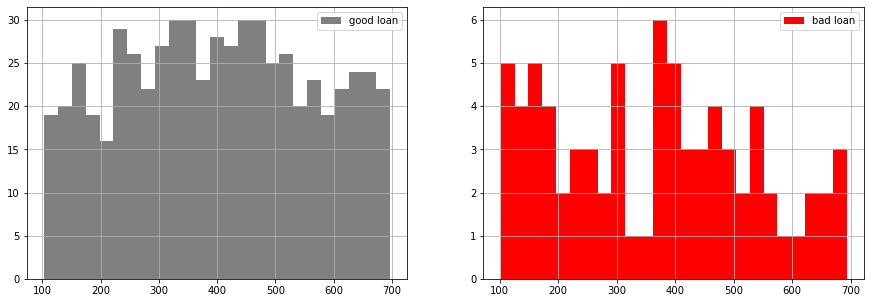

In [26]:
# To plot the histogram of the time difference between opening the account and the taking the loan
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
df_good['DID'].astype('timedelta64[D]').hist(ax = ax1, label = 'good loan', color = 'grey', bins = 25)
df_bad['DID'].astype('timedelta64[D]').hist(ax = ax2, label = 'bad loan', color = 'red', bins = 25)

ax1.legend()
ax2.legend()

## Joining district along with the loan and account tables

In [27]:
query = """SELECT * FROM Loan JOIN Account USING(account_id) JOIN District USING(district_id)"""

df1 = db.to_df(query)

In [28]:
df1.sample(10)

,district_id,account_id,loan_id,Loan_date,amount,duration,payments,status,frequency,Account_date,...,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
578,42,2142,5384,1998-03-07,23328,12,1944.00,C,POPLATEK MESICNE,1997-09-01,...,5,2,7,59.1,8388,2.41,2.94,87,1658,1668
192,34,7861,6600,1995-10-08,21852,36,607.00,A,POPLATEK MESICNE,1995-04-22,...,1,4,5,87.7,9675,6.43,7.68,100,5323,5190
390,72,5118,6037,1997-05-04,53232,48,1109.00,C,POPLATEK MESICNE,1995-08-05,...,7,4,4,62.6,8994,3.80,4.79,110,9672,9208
122,12,9869,7004,1995-03-15,331560,60,5526.00,C,POPLATEK MESICNE,1993-08-21,...,6,1,6,58.0,8754,3.83,4.31,137,3804,3868
405,64,4293,5850,1997-05-22,164196,36,4561.00,C,POPLATEK PO OBRATU,1996-02-04,...,10,2,10,74.7,9624,1.60,2.31,145,4484,4265
2,55,10364,7121,1993-11-10,21924,36,609.00,A,POPLATEK MESICNE,1993-01-17,...,18,0,9,33.9,8743,1.88,2.43,111,3659,3894
285,32,1886,5337,1996-07-31,162468,36,4513.00,C,POPLATEK MESICNE,1996-03-05,...,7,2,10,81.0,9272,2.80,3.22,118,4340,4505
108,60,4448,5887,1994-10-03,192744,36,5354.00,A,POPLATEK MESICNE,1993-06-02,...,4,1,4,51.9,8441,3.45,4.48,115,1879,2252
652,5,2000,5354,1998-07-14,290820,60,4847.00,C,POPLATEK MESICNE,1997-08-06,...,4,1,6,51.4,9307,3.85,4.43,118,2616,3040
72,24,8073,6650,1994-02-17,49320,12,4110.00,B,POPLATEK PO OBRATU,1993-09-03,...,6,2,8,80.0,8991,1.39,2.01,128,5198,5273


In [29]:
df1 = df1.rename(columns = {'A4': 'No_inhabitants', 'A11': 'Average_salary', 'A14': 'No_entrepreneur_per1000'})

df1['Average_unemployment_rate'] = df1[['A12', 'A13']].mean(axis = 1)
df1['Average_crime_rate'] = df1[['A15', 'A16']].mean(axis = 1)/df1['No_inhabitants']

df1.head()

,district_id,account_id,loan_id,Loan_date,amount,duration,payments,status,frequency,Account_date,...,A9,A10,Average_salary,A12,A13,No_entrepreneur_per1000,A15,A16,Average_unemployment_rate,Average_crime_rate
0,44,5270,6077,1993-11-22,79608,24,3317.00,A,POPLATEK MESICNE,1993-01-13,...,7,53.0,8254,2.79,3.76,97,2166,2325,3.275,0.021263
1,15,11265,7284,1993-09-15,52788,12,4399.00,A,POPLATEK MESICNE,1993-01-14,...,5,51.9,9045,3.13,3.60,124,1845,1879,3.365,0.031669
2,55,10364,7121,1993-11-10,21924,36,609.00,A,POPLATEK MESICNE,1993-01-17,...,9,33.9,8743,1.88,2.43,111,3659,3894,2.155,0.024048
3,54,3834,5754,1994-09-28,23052,12,1921.00,A,POPLATEK MESICNE,1993-01-19,...,1,100.0,9897,1.60,1.96,140,18721,18696,1.780,0.048271
4,68,9307,6895,1994-09-19,41904,12,3492.00,A,POPLATEK MESICNE,1993-01-24,...,6,57.2,9893,4.09,4.72,96,5623,5887,4.405,0.025148


In [30]:
df1.columns

Index(['district_id', 'account_id', 'loan_id', 'Loan_date', 'amount',
       'duration', 'payments', 'status', 'frequency', 'Account_date', 'A2',
       'A3', 'No_inhabitants', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Average_salary', 'A12', 'A13', 'No_entrepreneur_per1000', 'A15', 'A16',
       'Average_unemployment_rate', 'Average_crime_rate'],
      dtype='object')

In [31]:
df1_good = df1[df1['status'].isin(['A', 'C'])]
df1_bad = df1[df1['status'].isin(['B', 'D'])]

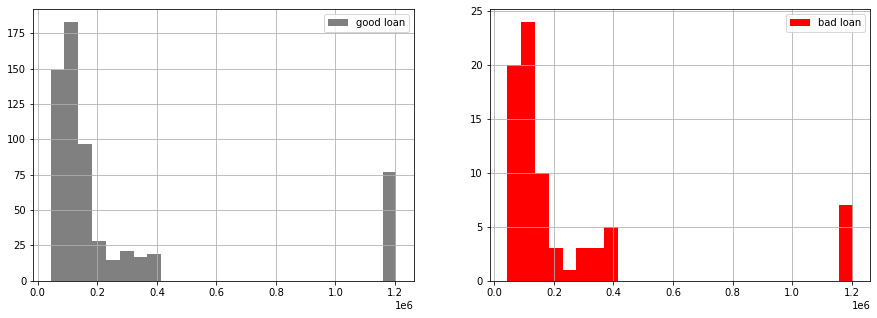

In [32]:
# Histograme plot for Number of inhabitants

fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15,5))

df1_good['No_inhabitants'].hist(ax = ax1, label = 'good loan', color = 'grey', bins = 25)
df1_bad['No_inhabitants'].hist(ax = ax2, label = 'bad loan', color = 'red', bins = 25)

ax1.legend()
ax2.legend()


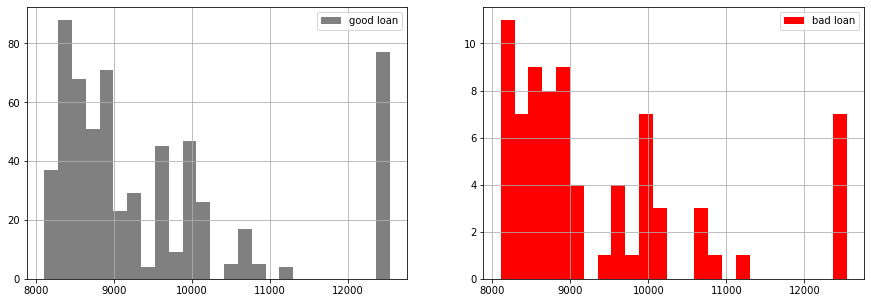

In [33]:
# Histogram plot for average salary

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
df1_good['Average_salary'].hist(ax = ax1, label = 'good loan', color = 'grey', bins = 25)
df1_bad['Average_salary'].hist(ax = ax2, label = 'bad loan', color = 'red', bins = 25)

ax1.legend()
ax2.legend()

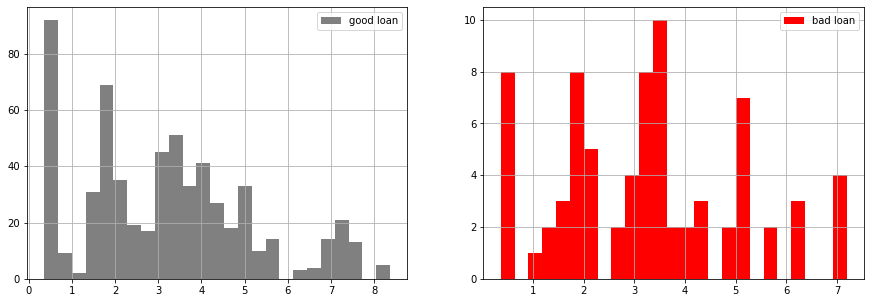

In [34]:
# Histogram to plot for average unemployment rate 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
df1_good['Average_unemployment_rate'].hist(ax = ax1, label = 'good loan', color = 'grey', bins = 25)
df1_bad['Average_unemployment_rate'].hist(ax = ax2, label = 'bad loan', color = 'red', bins = 25)

ax1.legend()
ax2.legend()

In [35]:
df1['Average_unemployment_rate']

0      3.275
1      3.365
2      2.155
3      1.780
4      4.405
       ...  
677    7.655
678    7.190
679    4.835
680    7.190
681    3.965
Name: Average_unemployment_rate, Length: 682, dtype: float64

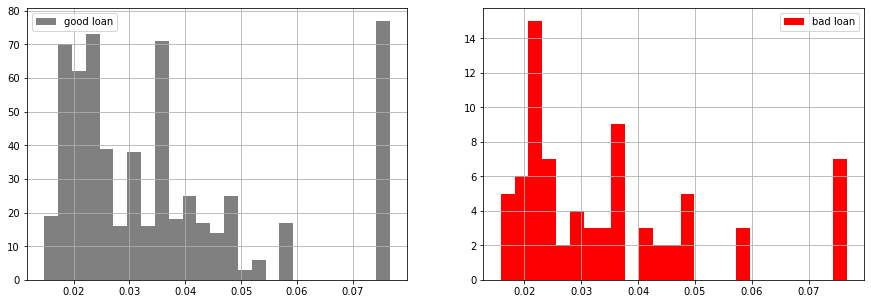

In [36]:
# Histogram for average crime rate

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))

df1_good['Average_crime_rate'].hist(ax = ax1, label = 'good loan', color = 'grey', bins = 25)
df1_bad['Average_crime_rate'].hist(ax = ax2, label = 'bad loan', color = 'red', bins = 25)

ax1.legend()
ax2.legend()

## Matching order tabel with loan table

In [37]:
query = 'SELECT * FROM Loan;'

df2 = db.to_df(query)

In [38]:
df2.head()

,loan_id,account_id,Loan_date,amount,duration,payments,status
0,5314,1787,1993-07-05,96396,12,8033.00,B
1,5316,1801,1993-07-11,165960,36,4610.00,A
2,6863,9188,1993-07-28,127080,60,2118.00,A
3,5325,1843,1993-08-03,105804,36,2939.00,A
4,7240,11013,1993-09-06,274740,60,4579.00,A


In [39]:
query = """
        SELECT account_id, amount Order_amount
        FROM `Order`
        WHERE account_id in (SELECT account_id FROM Loan);
        """

df3 = db.to_df(query)

In [40]:
df3.head()

,account_id,Order_amount
0,2,3372.70
1,2,7266.00
2,19,2523.20
3,25,2523.20
4,25,6817.00


In [41]:
# Datatype of Order_amount was 'Object' before changing it to 'float'

df3['Order_amount'] = df3['Order_amount'].astype('float')

In [42]:
df3.groupby('account_id').mean()

,Order_amount
account_id,
2,5319.350000
19,2523.200000
25,2653.550000
37,2576.375000
38,2416.700000
...,...
11327,2662.500000
11328,4674.000000
11349,8942.000000


In [43]:
df4 = df2.set_index('account_id').join(df3.groupby('account_id').mean())
df4.head()

# or use pd.merge(df2, df3.groupby('account_id').mean(), on = 'account_id', how = 'outer').set_index('account_id')

,loan_id,Loan_date,amount,duration,payments,status,Order_amount
account_id,,,,,,,
1787,5314,1993-07-05,96396,12,8033.00,B,8033.200000
1801,5316,1993-07-11,165960,36,4610.00,A,3288.000000
9188,6863,1993-07-28,127080,60,2118.00,A,2647.825000
1843,5325,1993-08-03,105804,36,2939.00,A,4966.350000
11013,7240,1993-09-06,274740,60,4579.00,A,4944.666667


In [44]:
df4 = df4.rename(columns = {'Order_amount': 'Average order_amount'})
df4.head()

,loan_id,Loan_date,amount,duration,payments,status,Average order_amount
account_id,,,,,,,
1787,5314,1993-07-05,96396,12,8033.00,B,8033.200000
1801,5316,1993-07-11,165960,36,4610.00,A,3288.000000
9188,6863,1993-07-28,127080,60,2118.00,A,2647.825000
1843,5325,1993-08-03,105804,36,2939.00,A,4966.350000
11013,7240,1993-09-06,274740,60,4579.00,A,4944.666667


In [45]:
df4_good = df4[df4['status'].isin(['A', 'C'])]
df4_bad = df4[df4['status'].isin(['B', 'D'])]

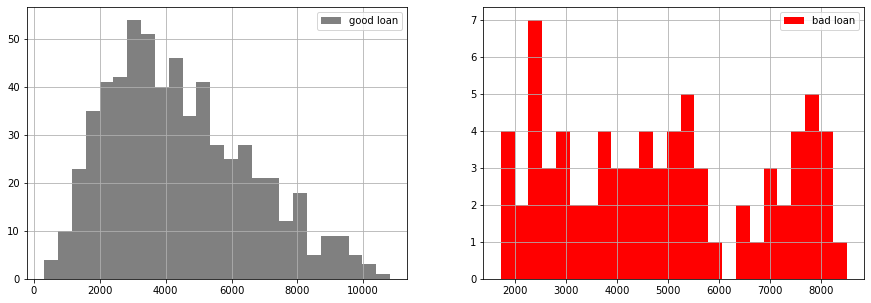

In [46]:
# histogram plot for average order amount

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
df4_good['Average order_amount'].hist(ax = ax1, label = 'good loan', color = 'grey', bins = 25)
df4_bad['Average order_amount'].hist(ax= ax2, label = 'bad loan', color = 'red', bins = 25)

ax1.legend()
ax2.legend()

## Combining loan table with transaction table

In [47]:
query = """
        SELECT * 
        FROM Loan;"""

df5 = db.to_df(query)

In [48]:
df5.head()

,loan_id,account_id,Loan_date,amount,duration,payments,status
0,5314,1787,1993-07-05,96396,12,8033.00,B
1,5316,1801,1993-07-11,165960,36,4610.00,A
2,6863,9188,1993-07-28,127080,60,2118.00,A
3,5325,1843,1993-08-03,105804,36,2939.00,A
4,7240,11013,1993-09-06,274740,60,4579.00,A


In [49]:
query = """
        SELECT account_id, amount Trans_amount, balance Trans_balance
        FROM Trans WHERE account_id IN (SELECT account_id FROM Loan);
        """

df6 = db.to_df(query)

In [50]:
df6.head()

,account_id,Trans_amount,Trans_balance
0,5270,800,800
1,5270,44749,45549
2,11265,1000,1000
3,10364,1100,1100
4,3834,700,700


In [51]:
No_transaction = df6.groupby('account_id').count().iloc[:,1]
No_transaction.name = 'No_transaction'
No_transaction

account_id
2        478
19       303
25       274
37       130
38       130
        ... 
11327     75
11328    146
11349    304
11359    378
11362    344
Name: No_transaction, Length: 682, dtype: int64

In [52]:
df6 = df6.groupby('account_id').mean()
df6.columns = ['Average_trans_amount', 'Average_trans_balance']
df6.head()

,Average_trans_amount,Average_trans_balance
account_id,,
2,6593.125523,36540.780335
19,5199.775578,16253.069307
25,10797.649635,56279.237226
37,7293.530769,37547.484615
38,4399.630769,34462.384615


In [53]:
df7 = df5.set_index('account_id').join(df6).join(No_transaction)
df7.sample(5)

,loan_id,Loan_date,amount,duration,payments,status,Average_trans_amount,Average_trans_balance,No_transaction
account_id,,,,,,,,,
8680,6751,1996-07-14,85716,36,2381.00,C,4331.604000,21190.644000,250
2350,5451,1997-05-11,159744,48,3328.00,C,11007.949749,51807.778894,199
1389,5241,1998-09-02,125472,24,5228.00,C,10603.198413,48904.253968,126
10266,7097,1993-12-23,75624,24,3151.00,B,9714.814570,38446.620309,453
9627,6955,1995-11-22,244368,48,5091.00,C,13069.827778,63065.947222,360


In [54]:
print(df5.shape, df6.shape, No_transaction.shape, df7.shape)

(682, 7) (682, 2) (682,) (682, 9)


In [55]:
df7_good = df7[df7['status'].isin(['A', 'C'])]
df7_bad = df7[df7['status'].isin(['B', 'D'])]

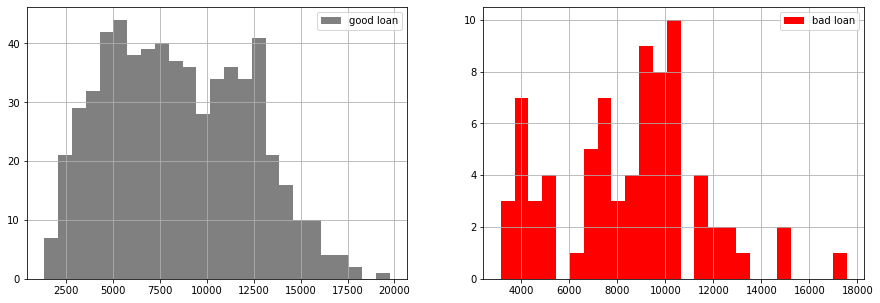

In [56]:
# Histogram plot for average transaction amount

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))

df7_good['Average_trans_amount'].hist(ax = ax1, label = 'good loan', color = 'grey', bins = 25)
df7_bad['Average_trans_amount'].hist(ax = ax2, label = 'bad loan', color = 'red', bins = 25)

ax1.legend()
ax2.legend()

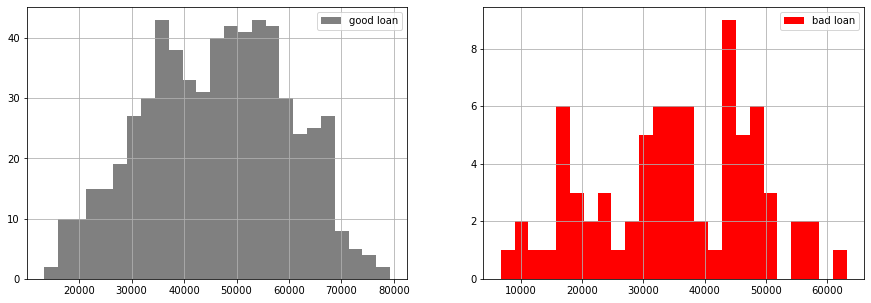

In [57]:
# Histogram plot for average balance after transaction

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))

df7_good['Average_trans_balance'].hist(ax = ax1, label = 'good loan', color = 'grey', bins = 25)
df7_bad['Average_trans_balance'].hist(ax = ax2, label = 'bad loan', color = 'red', bins = 25)

ax1.legend()
ax2.legend()

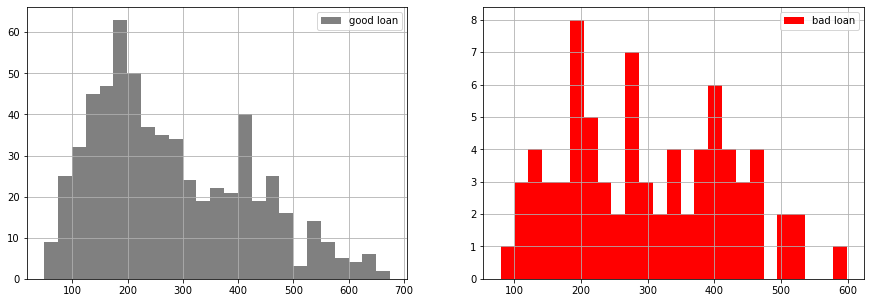

In [58]:
# Histogram for number of transaction

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))

df7_good['No_transaction'].hist(ax = ax1, label = 'good loan', color = 'grey', bins = 25)
df7_bad['No_transaction'].hist(ax = ax2, label = 'bad loan', color = 'red', bins = 25)

ax1.legend()
ax2.legend()

## Combining Loan tabel with Credit card tabel

In [59]:
query = """
        SELECT account_id, card_id, Card.type Card_type, status
        FROM Loan JOIN Desposition USING(account_id) LEFT JOIN Card USING(disp_id)
        """

# JOIN operation with USING gives only those rows in which the column mention in the USING matches.

df8 = db.to_df(query)
df8.sample(5)

,account_id,card_id,Card_type,status
106,5120,823.0,classic,A
221,1083,NaN,None,C
495,5735,NaN,None,D
367,3637,NaN,None,A
119,5213,833.0,classic,D


In [60]:
df8_card = df8[~df8['card_id'].isna()]

# FROM Loan JOIN Desposition USING(account_id) JOIN Card USING(disp_id); can also be used but it was not working

In [61]:
# query = """
#         SELECT account_id, card_id, Card.type Card_type, status
#         FROM Loan JOIN Desposition USING(account_id) JOIN Card USING(disp_id);
#         """

# df9 = db.to_df(query)
# df9.sample(5)

In [62]:
df8_good = df8[df8['status'].isin(['A', 'C'])]
df8_bad = df8[df8['status'].isin(['B', 'D'])]

<AxesSubplot:xlabel='Card_type'>

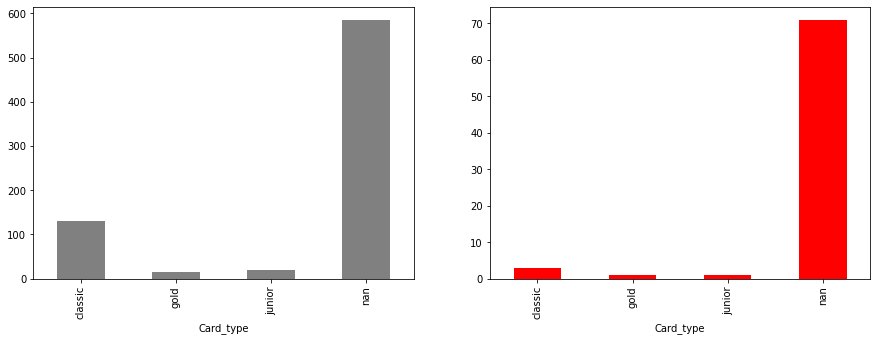

In [63]:
# Barchart for credit card type

import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5)) 

df8_good[['Card_type', 'account_id']].groupby('Card_type', dropna = False).count().plot.bar(ax = ax1, color = 'grey', label = 'good loan', legend = False)
df8_bad[['Card_type', 'account_id']].groupby('Card_type', dropna = False).count().plot.bar(ax = ax2, color = 'red', label = 'bad loan', legend = False)

## Combing Account table and Client Table

In [64]:
# Taking aprrox. 6 mins to run

query = """
        SELECT * 
        FROM Loan JOIN Desposition USING(account_id) 
        JOIN Client USING(Client_id) 
        JOIN District USING(district_id);
        """
df9 = db.to_df(query)

In [65]:
df9.head()

,district_id,client_id,account_id,loan_id,Loan_date,amount,duration,payments,status,disp_id,...,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,2,2,4959,1994-01-05,80952,24,3373.00,A,2,...,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,1,3,2,4959,1994-01-05,80952,24,3373.00,A,3,...,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
2,66,210,173,5002,1994-05-31,104808,12,8734.00,A,210,...,2,3,5,48.3,8512,3.51,4.12,102,2247,2103
3,66,211,173,5002,1994-05-31,104808,12,8734.00,A,211,...,2,3,5,48.3,8512,3.51,4.12,102,2247,2103
4,60,512,426,5060,1994-07-19,252060,60,4201.00,D,512,...,4,1,4,51.9,8441,3.45,4.48,115,1879,2252


In [66]:
query = """
         SELECT account_id, district_id Acc_dist_id
         FROM Loan JOIN Account USING(account_id);
         """

df10 = db.to_df(query)

In [67]:
df10.head()

,account_id,Acc_dist_id
0,5270,44
1,11265,15
2,10364,55
3,3834,54
4,9307,68


In [68]:
df11 = df9.set_index('account_id').join(df10.set_index('account_id'))

# or
# df12 = pd.merge(df9, df10, on = 'account_id', how = 'inner').set_index('account_id')

In [69]:
df11.head()

,district_id,client_id,loan_id,Loan_date,amount,duration,payments,status,disp_id,type,...,A8,A9,A10,A11,A12,A13,A14,A15,A16,Acc_dist_id
account_id,,,,,,,,,,,,,,,,,,,,,
2,1,2,4959,1994-01-05,80952,24,3373.00,A,2,OWNER,...,1,1,100.0,12541,0.29,0.43,167,85677,99107,1
2,1,3,4959,1994-01-05,80952,24,3373.00,A,3,DISPONENT,...,1,1,100.0,12541,0.29,0.43,167,85677,99107,1
19,21,25,4961,1996-04-29,30276,12,2523.00,B,25,OWNER,...,1,7,67.0,9104,1.51,2.07,123,2299,2354,21
25,68,31,4962,1997-12-08,30276,12,2523.00,A,31,OWNER,...,2,6,57.2,9893,4.09,4.72,96,5623,5887,68
37,20,45,4967,1998-10-14,318480,60,5308.00,D,45,OWNER,...,1,4,58.4,8547,2.65,3.64,120,1563,1542,20


In [70]:
df11['type'].unique()

array(['OWNER', 'DISPONENT'], dtype=object)

In [71]:
df11 = df11[df11['type'] == 'OWNER']

In [72]:
print(df11.shape, df11.index.unique().shape)

(682, 28) (682,)


In [73]:
df11['Same_district'] = df11['district_id'] == df11['Acc_dist_id']

In [74]:
df11.head()

,district_id,client_id,loan_id,Loan_date,amount,duration,payments,status,disp_id,type,...,A9,A10,A11,A12,A13,A14,A15,A16,Acc_dist_id,Same_district
account_id,,,,,,,,,,,,,,,,,,,,,
2,1,2,4959,1994-01-05,80952,24,3373.00,A,2,OWNER,...,1,100.0,12541,0.29,0.43,167,85677,99107,1,True
19,21,25,4961,1996-04-29,30276,12,2523.00,B,25,OWNER,...,7,67.0,9104,1.51,2.07,123,2299,2354,21,True
25,68,31,4962,1997-12-08,30276,12,2523.00,A,31,OWNER,...,6,57.2,9893,4.09,4.72,96,5623,5887,68,True
37,20,45,4967,1998-10-14,318480,60,5308.00,D,45,OWNER,...,4,58.4,8547,2.65,3.64,120,1563,1542,20,True
38,19,46,4968,1998-04-19,110736,48,2307.00,C,46,OWNER,...,4,52.7,8402,3.13,3.98,120,999,1099,19,True


In [75]:
df11['Loan_date'] = df11['Loan_date'].astype('datetime64')
df11['birth_date'] = df11['birth_date'].astype('datetime64')
df11['Owner_age'] = df11['Loan_date'] - df11['birth_date']

In [76]:
df11['Owner_age']

account_id
2       17867 days
19      20826 days
25      13086 days
37      16850 days
38      21264 days
           ...    
11327    7157 days
11328   16748 days
11349   18261 days
11359   10342 days
11362   12488 days
Name: Owner_age, Length: 682, dtype: timedelta64[ns]

In [77]:
# To convert days value of timedelta64 type into year values of float64 type

import numpy as np

df11['Owner_age'] = df11['Owner_age']/np.timedelta64(1, 'Y')

In [78]:
df11 = df11.reset_index()
df11_good = df11[df11['status'].isin(['A', 'C'])]
df11_bad = df11[df11['status'].isin(['B', 'D'])]

In [79]:
df11_good.head()

,account_id,district_id,client_id,loan_id,Loan_date,amount,duration,payments,status,disp_id,...,A10,A11,A12,A13,A14,A15,A16,Acc_dist_id,Same_district,Owner_age
0,2,1,2,4959,1994-01-05,80952,24,3373.00,A,2,...,100.0,12541,0.29,0.43,167,85677,99107,1,True,48.918184
2,25,68,31,4962,1997-12-08,30276,12,2523.00,A,31,...,57.2,9893,4.09,4.72,96,5623,5887,68,True,35.828251
4,38,19,46,4968,1998-04-19,110736,48,2307.00,C,46,...,52.7,8402,3.13,3.98,120,999,1099,19,True,58.218855
5,67,16,78,4973,1996-05-02,165960,24,6915.00,A,78,...,56.9,8427,1.12,1.54,107,1874,1913,16,True,51.886076
6,97,74,116,4986,1997-08-10,102876,12,8573.00,A,116,...,100.0,10673,4.75,5.44,100,18782,18347,74,True,55.532968


<AxesSubplot:xlabel='Same_district'>

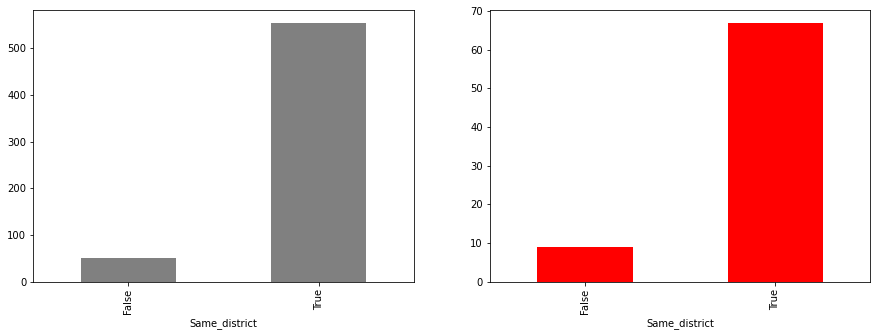

In [80]:
# Bar chart for client district and account district
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))

df11_good[['account_id', 'Same_district']].groupby('Same_district').count().plot.bar(ax = ax1, color = 'grey', legend = False)
df11_bad[['account_id', 'Same_district']].groupby('Same_district').count().plot.bar(ax = ax2, color = 'red', legend = False)

<AxesSubplot:xlabel='gender'>

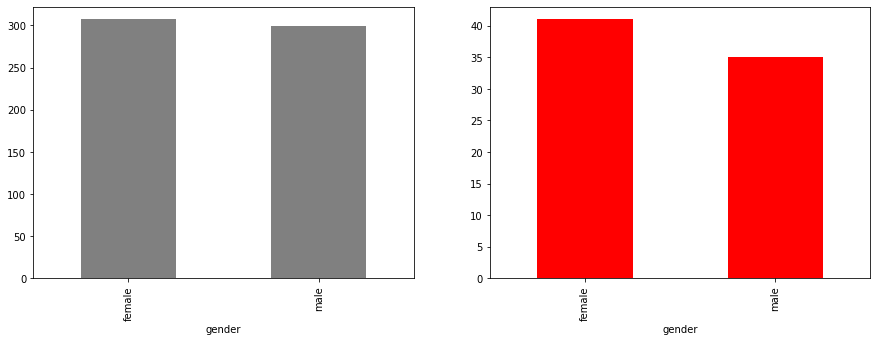

In [81]:
# Barchart for gender

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))

df11_good[['gender', 'account_id']].groupby('gender').count().plot.bar(ax = ax1, color = 'grey', legend = False)
df11_bad[['gender', 'account_id']].groupby('gender').count().plot.bar(ax= ax2, color = 'red', legend = False)

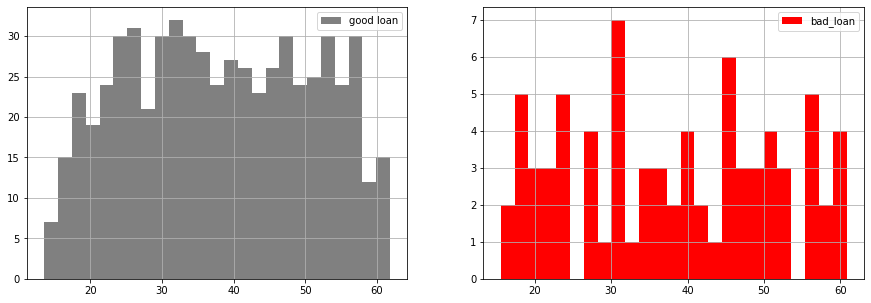

In [82]:
# histogram for owner age

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))

df11_good['Owner_age'].hist(ax = ax1, label = 'good loan', color = 'grey', bins = 25)
df11_bad['Owner_age'].hist(ax = ax2, label = 'bad_loan', color = 'red', bins = 25)

ax1.legend()
ax2.legend()

# Finalizing Features

In [4]:
query = """
        SELECT account_id, amount, duration, payments, Loan_date, status, Account_date, A4, A11, A12, A13, A14, A15, A16
        FROM Loan JOIN Account USING(account_id) JOIN District USING(district_id)
        """

df = db.to_df(query)

In [5]:
df.head()

,account_id,amount,duration,payments,Loan_date,status,Account_date,A4,A11,A12,A13,A14,A15,A16
0,5270,79608,24,3317.00,1993-11-22,A,1993-01-13,105606,8254,2.79,3.76,97,2166,2325
1,11265,52788,12,4399.00,1993-09-15,A,1993-01-14,58796,9045,3.13,3.60,124,1845,1879
2,10364,21924,36,609.00,1993-11-10,A,1993-01-17,157042,8743,1.88,2.43,111,3659,3894
3,3834,23052,12,1921.00,1994-09-28,A,1993-01-19,387570,9897,1.60,1.96,140,18721,18696
4,9307,41904,12,3492.00,1994-09-19,A,1993-01-24,228848,9893,4.09,4.72,96,5623,5887


In [6]:
df.set_index('account_id', inplace = True)

In [7]:
df['DID'] = (df['Loan_date'] - df['Account_date']).dt.days
df = df.rename(columns = {'A4': 'No_inhabitants', 'A11': 'Average_salary'})
df['Average_unemployment_rate'] = df[['A12', 'A13']].mean(axis = 1)
df['Average_crime_rate'] = df[['A15', 'A16']].mean(axis = 1)/df['No_inhabitants']

In [8]:
query = """
        SELECT account_id, amount Order_amount
        FROM `Order`
        WHERE account_id IN(SELECT account_id FROM Loan);
        """

df2 = db.to_df(query)

In [9]:
df2['Order_amount'] = df2['Order_amount'].astype('float')
df = df.join(df2.groupby('account_id').mean())
df = df.rename(columns = {'Order_amount': 'Average_order_amount'})

In [10]:
df.head()

,amount,duration,payments,Loan_date,status,Account_date,No_inhabitants,Average_salary,A12,A13,A14,A15,A16,DID,Average_unemployment_rate,Average_crime_rate,Average_order_amount
account_id,,,,,,,,,,,,,,,,,
5270,79608,24,3317.00,1993-11-22,A,1993-01-13,105606,8254,2.79,3.76,97,2166,2325,313,3.275,0.021263,3317.000000
11265,52788,12,4399.00,1993-09-15,A,1993-01-14,58796,9045,3.13,3.60,124,1845,1879,244,3.365,0.031669,2504.000000
10364,21924,36,609.00,1993-11-10,A,1993-01-17,157042,8743,1.88,2.43,111,3659,3894,297,2.155,0.024048,3435.500000
3834,23052,12,1921.00,1994-09-28,A,1993-01-19,387570,9897,1.60,1.96,140,18721,18696,617,1.780,0.048271,1772.200000
9307,41904,12,3492.00,1994-09-19,A,1993-01-24,228848,9893,4.09,4.72,96,5623,5887,603,4.405,0.025148,3626.833333


In [11]:
query = """
        SELECT account_id, amount Trans_amount, balance Trans_balance
        FROM Trans
        WHERE account_id IN (SELECT account_id FROM Loan);
        """

df3 = db.to_df(query)

In [12]:
df3.head()

,account_id,Trans_amount,Trans_balance
0,5270,800,800
1,5270,44749,45549
2,11265,1000,1000
3,10364,1100,1100
4,3834,700,700


In [13]:
No_transaction = df3.groupby('account_id').count().iloc[: , 1]

In [14]:
No_transaction.name = 'No_transaction'

In [15]:
df3 = df3.groupby('account_id').mean()
df3.columns = ['Average_trans_amount', 'Average_trans_balance']

In [16]:
df = df.join(df3).join(No_transaction)

In [17]:
df.head()

,amount,duration,payments,Loan_date,status,Account_date,No_inhabitants,Average_salary,A12,A13,A14,A15,A16,DID,Average_unemployment_rate,Average_crime_rate,Average_order_amount,Average_trans_amount,Average_trans_balance,No_transaction
account_id,,,,,,,,,,,,,,,,,,,,
5270,79608,24,3317.00,1993-11-22,A,1993-01-13,105606,8254,2.79,3.76,97,2166,2325,313,3.275,0.021263,3317.000000,15016.194805,65773.456710,462
11265,52788,12,4399.00,1993-09-15,A,1993-01-14,58796,9045,3.13,3.60,124,1845,1879,244,3.365,0.031669,2504.000000,2654.845041,22010.194215,484
10364,21924,36,609.00,1993-11-10,A,1993-01-17,157042,8743,1.88,2.43,111,3659,3894,297,2.155,0.024048,3435.500000,4808.558522,46258.338809,487
3834,23052,12,1921.00,1994-09-28,A,1993-01-19,387570,9897,1.60,1.96,140,18721,18696,617,1.780,0.048271,1772.200000,3333.601504,24129.730827,665
9307,41904,12,3492.00,1994-09-19,A,1993-01-24,228848,9893,4.09,4.72,96,5623,5887,603,4.405,0.025148,3626.833333,7649.588598,58766.853621,649


In [18]:
query = """
        SELECT account_id, Card.type Card_type
        FROM Loan JOIN Desposition USING(account_id) LEFT JOIN Card USING(disp_id)
        WHERE Desposition.type = 'OWNER';
        """

df4 = db.to_df(query)

In [19]:
df4.head()

,account_id,Card_type
0,7753,classic
1,3050,classic
2,8173,junior
3,2167,classic
4,790,classic


In [20]:
df = df.join(df4.set_index('account_id'), how = 'left')

In [21]:
df['Card_type'].fillna('No', inplace = True)

In [22]:
df.head()

,amount,duration,payments,Loan_date,status,Account_date,No_inhabitants,Average_salary,A12,A13,...,A15,A16,DID,Average_unemployment_rate,Average_crime_rate,Average_order_amount,Average_trans_amount,Average_trans_balance,No_transaction,Card_type
account_id,,,,,,,,,,,,,,,,,,,,,
5270,79608,24,3317.00,1993-11-22,A,1993-01-13,105606,8254,2.79,3.76,...,2166,2325,313,3.275,0.021263,3317.000000,15016.194805,65773.456710,462,No
11265,52788,12,4399.00,1993-09-15,A,1993-01-14,58796,9045,3.13,3.60,...,1845,1879,244,3.365,0.031669,2504.000000,2654.845041,22010.194215,484,No
10364,21924,36,609.00,1993-11-10,A,1993-01-17,157042,8743,1.88,2.43,...,3659,3894,297,2.155,0.024048,3435.500000,4808.558522,46258.338809,487,No
3834,23052,12,1921.00,1994-09-28,A,1993-01-19,387570,9897,1.60,1.96,...,18721,18696,617,1.780,0.048271,1772.200000,3333.601504,24129.730827,665,No
9307,41904,12,3492.00,1994-09-19,A,1993-01-24,228848,9893,4.09,4.72,...,5623,5887,603,4.405,0.025148,3626.833333,7649.588598,58766.853621,649,No


In [23]:
query = """
        SELECT account_id, Loan_date, Account.district_id Account_dist_id, Client.district_id Client_dist_id, gender, birth_date
        FROM Loan JOIN Account USING(account_id) JOIN Desposition USING(account_id) JOIN Client USING(Client_id) WHERE Desposition.type = 'Owner';
        """

df5 = db.to_df(query)

In [24]:
df5.head()

,account_id,Loan_date,Account_dist_id,Client_dist_id,gender,birth_date
0,2,1994-01-05,1,1,male,1945-02-04
1,19,1996-04-29,21,21,female,1939-04-23
2,25,1997-12-08,68,68,male,1962-02-09
3,37,1998-10-14,20,20,male,1952-08-26
4,38,1998-04-19,19,19,female,1940-01-30


In [25]:
df5['Same_district'] = df5['Account_dist_id'] == df5['Client_dist_id']
df5['Owner_age'] = (df5['Loan_date'] - df5['birth_date']).astype('timedelta64[M]')

In [26]:
df = df.join(df5.set_index('account_id')[['Same_district', 'gender', 'Owner_age']])

In [27]:
df.head()

,amount,duration,payments,Loan_date,status,Account_date,No_inhabitants,Average_salary,A12,A13,...,Average_unemployment_rate,Average_crime_rate,Average_order_amount,Average_trans_amount,Average_trans_balance,No_transaction,Card_type,Same_district,gender,Owner_age
account_id,,,,,,,,,,,,,,,,,,,,,
5270,79608,24,3317.00,1993-11-22,A,1993-01-13,105606,8254,2.79,3.76,...,3.275,0.021263,3317.000000,15016.194805,65773.456710,462,No,True,male,282.0
11265,52788,12,4399.00,1993-09-15,A,1993-01-14,58796,9045,3.13,3.60,...,3.365,0.031669,2504.000000,2654.845041,22010.194215,484,No,True,male,246.0
10364,21924,36,609.00,1993-11-10,A,1993-01-17,157042,8743,1.88,2.43,...,2.155,0.024048,3435.500000,4808.558522,46258.338809,487,No,True,male,398.0
3834,23052,12,1921.00,1994-09-28,A,1993-01-19,387570,9897,1.60,1.96,...,1.780,0.048271,1772.200000,3333.601504,24129.730827,665,No,True,female,646.0
9307,41904,12,3492.00,1994-09-19,A,1993-01-24,228848,9893,4.09,4.72,...,4.405,0.025148,3626.833333,7649.588598,58766.853621,649,No,False,male,242.0


In [28]:
df.shape

(682, 24)

In [29]:
df['Default'] = df['status'].isin(['A', 'D'])

In [50]:
df = df[['amount', 'duration', 'payments', 'DID', 'Average_order_amount',
         'Average_trans_amount', 'Average_trans_balance', 'No_transaction', 
         'Card_type', 'No_inhabitants', 'Average_salary', 'Average_unemployment_rate', 
         'Average_crime_rate', 'gender', 'Owner_age', 'Same_district']]

In [51]:
df.sample(10)

,amount,duration,payments,DID,Average_order_amount,Average_trans_amount,Average_trans_balance,No_transaction,Card_type,No_inhabitants,Average_salary,Average_unemployment_rate,Average_crime_rate,gender,Owner_age,Same_district
account_id,,,,,,,,,,,,,,,,
5477,349392,48,7279.0,657,6810.650000,12981.272085,68515.360424,283,classic,161954,8720,4.115,0.022784,male,520.0,True
4414,97224,24,4051.0,531,3758.666667,3752.485356,34073.244770,478,No,122603,8991,1.700,0.042703,female,526.0,False
1011,204000,60,3400.0,366,5242.750000,6724.876161,57193.650155,323,No,77917,8390,2.585,0.026965,male,619.0,True
9424,83628,36,2323.0,239,2322.700000,5486.906250,26198.531250,128,No,387570,9897,1.780,0.048271,female,239.0,True
9167,272220,60,4537.0,339,2729.825000,7580.163158,48846.994737,190,No,124605,8772,4.835,0.024124,female,687.0,True
347,187224,24,7801.0,504,7801.200000,10410.881266,43980.704485,379,No,114200,8403,5.730,0.021344,male,570.0,False
10478,267600,48,5575.0,678,5575.300000,11961.103627,55270.917098,193,No,285387,10177,7.190,0.035016,female,479.0,True
5395,158184,36,4394.0,497,4393.800000,9078.255102,52628.806122,196,No,162580,9538,1.660,0.035333,male,528.0,True
9828,126600,24,5275.0,693,5274.700000,11348.714286,45819.174877,406,No,75637,9622,0.520,0.046300,male,673.0,False


In [52]:
df.shape

(682, 16)

In [53]:
df.columns

Index(['amount', 'duration', 'payments', 'DID', 'Average_order_amount',
       'Average_trans_amount', 'Average_trans_balance', 'No_transaction',
       'Card_type', 'No_inhabitants', 'Average_salary',
       'Average_unemployment_rate', 'Average_crime_rate', 'gender',
       'Owner_age', 'Same_district'],
      dtype='object')

In [54]:
df.corr()

,amount,duration,payments,DID,Average_order_amount,Average_trans_amount,Average_trans_balance,No_transaction,No_inhabitants,Average_salary,Average_unemployment_rate,Average_crime_rate,Owner_age,Same_district
amount,1.000000,0.612402,0.689481,0.058287,0.455427,0.266109,0.069893,-0.087546,0.012496,-0.017310,-0.048633,-0.010472,-0.062281,0.061356
duration,0.612402,1.000000,-0.040189,0.039886,-0.022872,-0.059292,-0.076662,-0.096633,-0.053727,-0.073310,-0.036483,-0.085515,-0.031956,0.081778
payments,0.689481,-0.040189,1.000000,0.027685,0.652576,0.408952,0.174736,-0.015884,0.029347,0.019133,-0.006055,0.032347,-0.031452,-0.029017
DID,0.058287,0.039886,0.027685,1.000000,-0.028474,0.026760,0.093402,0.104509,-0.048688,-0.065968,0.010587,-0.061885,-0.040542,-0.043949
Average_order_amount,0.455427,-0.022872,0.652576,-0.028474,1.000000,0.530775,0.240336,-0.117881,-0.004336,-0.011021,-0.027085,-0.001247,0.016028,0.017529
Average_trans_amount,0.266109,-0.059292,0.408952,0.026760,0.530775,1.000000,0.734677,-0.103279,0.001883,0.003580,-0.005228,-0.000354,-0.017302,0.026707
Average_trans_balance,0.069893,-0.076662,0.174736,0.093402,0.240336,0.734677,1.000000,0.077614,0.004632,0.002162,0.022753,0.003876,-0.049912,-0.021091
No_transaction,-0.087546,-0.096633,-0.015884,0.104509,-0.117881,-0.103279,0.077614,1.000000,0.064205,0.078019,-0.021897,0.077026,-0.131838,-0.435578
No_inhabitants,0.012496,-0.053727,0.029347,-0.048688,-0.004336,0.001883,0.004632,0.064205,1.000000,0.910474,-0.495851,0.875280,-0.062108,-0.063489
Average_salary,-0.017310,-0.073310,0.019133,-0.065968,-0.011021,0.003580,0.002162,0.078019,0.910474,1.000000,-0.406817,0.918634,-0.066758,-0.055139


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

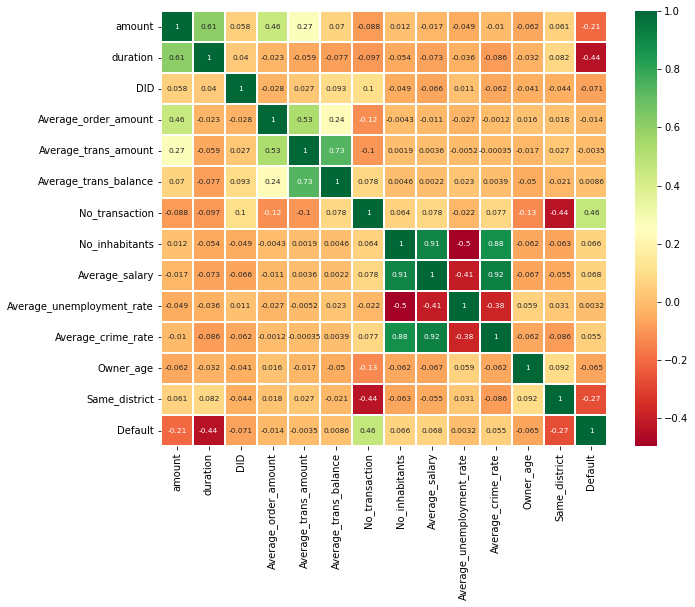

In [39]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), cmap = 'RdYlGn', annot = True, annot_kws = {'fontsize': 7.5}, linewidths = 0.2)

# Transformation

In [87]:
import pandas as pd

In [88]:
for i in df.columns:
    print(i , df[i].dtype)

amount int64
duration int64
payments float64
DID int64
Average_order_amount float64
Average_trans_amount float64
Average_trans_balance float64
No_transaction int64
Card_type object
No_inhabitants int64
Average_salary int64
Average_unemployment_rate float64
Average_crime_rate float64
gender object
Owner_age float64
Same_district bool


In [89]:
df['payments'] = df['payments'].astype('float')

In [131]:
df.to_csv('df.csv', index = False)

In [90]:
df3 = df.copy()

In [91]:
# To seperate numerical and categorical data

cat_columns = []
num_columns = []
bool_columns = []

for i in df3.columns:
    if df3[i].dtype == 'object':
        cat_columns.append(i)
    else:
        if df3[i].dtype =='bool':
            bool_columns.append(i)
        else:
            num_columns.append(i)
        
print(cat_columns,'\n\n', num_columns, '\n\n', bool_columns)

['Card_type', 'gender'] 

 ['amount', 'duration', 'payments', 'DID', 'Average_order_amount', 'Average_trans_amount', 'Average_trans_balance', 'No_transaction', 'No_inhabitants', 'Average_salary', 'Average_unemployment_rate', 'Average_crime_rate', 'Owner_age'] 

 ['Same_district']


In [140]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [141]:
column_transformer = ColumnTransformer([('num_trans', MinMaxScaler(), num_columns),
                                        ('cat_trans', OneHotEncoder(), cat_columns)], 
                                       remainder = 'passthrough'
                                      )

In [142]:
df_ml = pd.DataFrame(column_transformer.fit(df3))
df_ml.head()

ValueError: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed

In [95]:
print(len(df3.columns), df3.columns, '\n\n')
print(len(df_ml.columns), df_ml.columns)

16 Index(['amount', 'duration', 'payments', 'DID', 'Average_order_amount',
       'Average_trans_amount', 'Average_trans_balance', 'No_transaction',
       'Card_type', 'No_inhabitants', 'Average_salary',
       'Average_unemployment_rate', 'Average_crime_rate', 'gender',
       'Owner_age', 'Same_district'],
      dtype='object') 


20 RangeIndex(start=0, stop=20, step=1)


In [96]:
# To add feature names to the transformed dataframe

df_ml.columns = column_transformer.get_feature_names_out()
df_ml.head()

,num_trans__amount,num_trans__duration,num_trans__payments,num_trans__DID,num_trans__Average_order_amount,num_trans__Average_trans_amount,num_trans__Average_trans_balance,num_trans__No_transaction,num_trans__No_inhabitants,num_trans__Average_salary,num_trans__Average_unemployment_rate,num_trans__Average_crime_rate,num_trans__Owner_age,cat_trans__Card_type_No,cat_trans__Card_type_classic,cat_trans__Card_type_gold,cat_trans__Card_type_junior,cat_trans__gender_female,cat_trans__gender_male,remainder__Same_district
0,0.127386,0.25,0.313658,0.354622,0.286054,0.742303,0.814021,0.659744,0.054026,0.032498,0.363920,0.105253,0.206897,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.081606,0.00,0.426296,0.238655,0.208663,0.072560,0.211068,0.694888,0.013746,0.211013,0.375156,0.273272,0.144828,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.028923,0.50,0.031751,0.327731,0.297335,0.189249,0.545149,0.699681,0.098286,0.142857,0.224095,0.150217,0.406897,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.030848,0.00,0.168332,0.865546,0.139000,0.109335,0.240270,0.984026,0.296652,0.403295,0.177278,0.541346,0.834483,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.063027,0.00,0.331876,0.842017,0.315548,0.343177,0.717487,0.958466,0.160074,0.402392,0.504994,0.167978,0.137931,1.0,0.0,0.0,0.0,0.0,1.0,0.0


---
---
---

In [98]:
df3.columns

Index(['amount', 'duration', 'payments', 'DID', 'Average_order_amount',
       'Average_trans_amount', 'Average_trans_balance', 'No_transaction',
       'Card_type', 'No_inhabitants', 'Average_salary',
       'Average_unemployment_rate', 'Average_crime_rate', 'gender',
       'Owner_age', 'Same_district'],
      dtype='object')

In [121]:
df4 = [185544, 36, 5154.00, 293, 3670.400, 6633.824561, 22717.736842, 57, 'No', 124605, 8772, 4.835, 0.024124, 'male', 708.0, True]

cat_columns = []
num_columns = []
bool_columns = []

for i in df4:
    if type(i) == str:
        cat_columns.append(i)
    else:
        if type(i) == bool:
            bool_columns.append(i)
        else:
            num_columns.append(i)   

In [122]:
column_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_trans', MinMaxScaler(),
                                 ['amount', 'duration', 'payments', 'DID',
                                  'Average_order_amount',
                                  'Average_trans_amount',
                                  'Average_trans_balance', 'No_transaction',
                                  'No_inhabitants', 'Average_salary',
                                  'Average_unemployment_rate',
                                  'Average_crime_rate', 'Owner_age']),
                                ('cat_trans', OneHotEncoder(),
                                 ['Card_type', 'gender'])])

In [129]:
df4 = pd.DataFrame(df4, df.columns)
df4.T

,amount,duration,payments,DID,Average_order_amount,Average_trans_amount,Average_trans_balance,No_transaction,Card_type,No_inhabitants,Average_salary,Average_unemployment_rate,Average_crime_rate,gender,Owner_age,Same_district
0,185544,36,5154.0,293,3670.4,6633.824561,22717.736842,57,No,124605,8772,4.835,0.024124,male,708.0,True


In [130]:
column_transformer.transform(df4.T)

array([[0.30821384678410485, 0.5, 0.5048927753487404,
        0.32100840336134456, 0.3196953831508806, 0.288142569148125,
        0.22081622233706388, 0.012779552715654952, 0.07037410552329683,
        0.14940194087113512, 0.5586766541822722, 0.1514488321196928,
        0.9413793103448276, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, True]],
      dtype=object)

In [125]:
column_transformer.get_feature_names_out()

array(['num_trans__amount', 'num_trans__duration', 'num_trans__payments',
       'num_trans__DID', 'num_trans__Average_order_amount',
       'num_trans__Average_trans_amount',
       'num_trans__Average_trans_balance', 'num_trans__No_transaction',
       'num_trans__No_inhabitants', 'num_trans__Average_salary',
       'num_trans__Average_unemployment_rate',
       'num_trans__Average_crime_rate', 'num_trans__Owner_age',
       'cat_trans__Card_type_No', 'cat_trans__Card_type_classic',
       'cat_trans__Card_type_gold', 'cat_trans__Card_type_junior',
       'cat_trans__gender_female', 'cat_trans__gender_male',
       'remainder__Same_district'], dtype=object)

## Upscalling minority class data (default cases)

In [64]:
# Library package for upscalling imbalanced data

In [65]:
# pip install imbalanced-learn==0.8.0

In [66]:
df_ml_2 = df_ml.copy()

In [67]:
X = df_ml_2.iloc[:, :-1]
Y = df_ml_2.iloc[:, -1]

In [68]:
# import imblearn.over_sampling

In [69]:
from imblearn.over_sampling import ADASYN

In [70]:
oversample = ADASYN(sampling_strategy = 0.8)

In [71]:
x, y = oversample.fit_resample(X, Y)

In [72]:
print(Y.value_counts(), '\n\n', y.value_counts())

0.0    434
1.0    248
Name: remainder__Default, dtype: int64 

 0.0    434
1.0    355
Name: remainder__Default, dtype: int64


In [73]:
355/434

0.8179723502304147

---
---

# Modelling

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y, random_state = 6)

## <span style = 'background: Pink'> KNN model </span>

In [97]:
from sklearn.neighbors import KNeighborsClassifier

In [98]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [99]:
y_pred = knn.predict(x_test)

In [85]:
from sklearn.metrics import confusion_matrix, classification_report

In [101]:
confusion_matrix(y_test, y_pred)

array([[89, 20],
       [38, 51]], dtype=int64)

In [102]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

         0.0       0.70      0.82      0.75       109
         1.0       0.72      0.57      0.64        89

    accuracy                           0.71       198
   macro avg       0.71      0.69      0.70       198
weighted avg       0.71      0.71      0.70       198



## <span style = 'background: Pink'> Linear regression model </span>

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [105]:
y_pred = lr.predict(x_test)

In [106]:
confusion_matrix(y_test, y_pred)

array([[91, 18],
       [24, 65]], dtype=int64)

In [107]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81       109
         1.0       0.78      0.73      0.76        89

    accuracy                           0.79       198
   macro avg       0.79      0.78      0.78       198
weighted avg       0.79      0.79      0.79       198



## Cross-validation and Kfold

### Cross-validation

In [108]:
from sklearn.model_selection import cross_val_score

cross_val_score(lr, x_train, y_train, cv = 5, scoring = 'accuracy')

array([0.81512605, 0.87288136, 0.75423729, 0.80508475, 0.79661017])

In [109]:
# gives prediction of each element in the input when it was in test split in cross-validation

from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(lr, x, y, cv = 5)
confusion_matrix(y, y_pred)

array([[347,  87],
       [ 87, 268]], dtype=int64)

In [110]:
from sklearn.metrics import accuracy_score

In [111]:
accuracy_score(y, y_pred)

0.779467680608365

### Kfold

In [112]:
from sklearn.model_selection import StratifiedKFold

In [113]:
kfold = StratifiedKFold(n_splits = 5, shuffle = True)

for train_index, test_index in kfold.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    print(confusion_matrix(y_test, y_pred), '\n')

[[74 13]
 [19 52]] 

[[76 11]
 [15 56]] 

[[74 13]
 [ 7 64]] 

[[80  7]
 [17 54]] 

[[73 13]
 [22 49]] 



## GridsearchCV

In [74]:
from sklearn. model_selection import GridSearchCV

In [75]:
# hyperparameters tuning

params = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8]}
          
clf = GridSearchCV(KNeighborsClassifier(), param_grid = params, 
                   cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 6), 
                   scoring = 'f1')
          
clf.fit(x_train, y_train)
          
print(clf.best_params_)

NameError: name 'KNeighborsClassifier' is not defined

In [116]:
clf.cv_results_

{'mean_fit_time': array([0.0010088 , 0.0011991 , 0.00040002, 0.00060043, 0.00352478,
        0.00352507, 0.00312476]),
 'std_fit_time': array([0.00127445, 0.00159912, 0.00080004, 0.00120087, 0.0060988 ,
        0.00609948, 0.00624952]),
 'mean_score_time': array([0.08893771, 0.09378643, 0.09965506, 0.09469018, 0.09457035,
        0.09751687, 0.09540019]),
 'std_score_time': array([0.00947502, 0.00073616, 0.01084165, 0.008134  , 0.00851424,
        0.00638203, 0.01041643]),
 'param_n_neighbors': masked_array(data=[2, 3, 4, 5, 6, 7, 8],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6},
  {'n_neighbors': 7},
  {'n_neighbors': 8}],
 'split0_test_score': array([0.65346535, 0.71317829, 0.67857143, 0.72727273, 0.67857143,
        0.74796748, 0.73043478]),
 'split1_test_score': array([0.6407767 , 0.725806

## <span style = 'background: Yellow'> Defining function for model training with GridSearchCV </span>

In [76]:
def ml(model, folds, params = {}):
    
    global clf
    
    clf = GridSearchCV(model, param_grid = params, 
                       cv = StratifiedKFold(n_splits = folds, shuffle = True, random_state = 6),
                       scoring = 'f1')
    
    clf.fit(x_train, y_train)

In [173]:
ml(LogisticRegression(),5)                       

clf.cv_results_

{'mean_fit_time': array([0.01138492]),
 'std_fit_time': array([0.00222681]),
 'mean_score_time': array([0.00301595]),
 'std_score_time': array([0.00064784]),
 'params': [{}],
 'split0_test_score': array([0.75471698]),
 'split1_test_score': array([0.84482759]),
 'split2_test_score': array([0.87272727]),
 'split3_test_score': array([0.76635514]),
 'split4_test_score': array([0.77192982]),
 'mean_test_score': array([0.80211136]),
 'std_test_score': array([0.04742772]),
 'rank_test_score': array([1])}

## <span style = 'background: Pink'> Random Forest model </span>

In [174]:
from sklearn.ensemble import RandomForestClassifier

In [175]:
params = {'max_depth': [10, 20, 25, 30, 35, 40],
          'criterion': ['gini', 'entropy']}

ml(RandomForestClassifier(), 3, params)

In [176]:
clf.best_score_

0.7873088191165994

In [177]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 25}

In [179]:
clf2 = RandomForestClassifier(criterion = 'gini', max_depth = 25)
clf2.fit(x_train, y_train)
y_pred = clf2.predict(x_test)
accuracy_score(y_test, y_pred)

0.8280254777070064

## Threshold tunning

In [180]:
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.85      0.81        86
         1.0       0.79      0.69      0.74        71

    accuracy                           0.78       157
   macro avg       0.78      0.77      0.77       157
weighted avg       0.78      0.78      0.78       157



In [181]:
# Probability for the predicting each instance as 1

pred_prob_fr_posit = lr.predict_proba(x_test)[:,1]

### ROC_AUC curve

In [182]:
from sklearn.metrics import roc_auc_score, roc_curve

In [183]:
roc_auc_score(y_test, pred_prob_fr_posit)

0.8471994759253193

In [184]:
fpr, tpr, threshold = roc_curve(y_test, pred_prob_fr_posit)

In [185]:
sensitivity = tpr
specivity = 1- fpr

gmean = (sensitivity*specivity)**0.5

In [186]:
threshold[gmean.argmax()]

0.4779165519819697

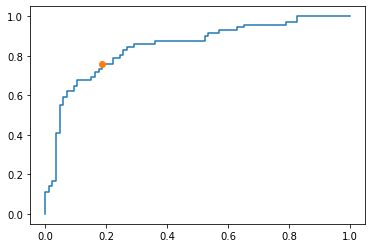

In [187]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.plot(fpr[gmean.argmax()], tpr[gmean.argmax()], marker = 'o')

In [188]:
# Youden's J statistics

Y_stat = tpr-fpr
threshold[Y_stat.argmax()]

0.3998203148439775

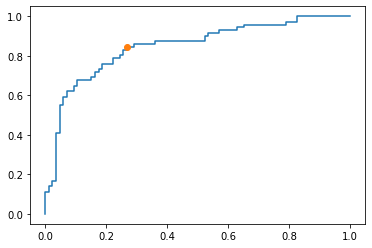

In [189]:
plt.plot(fpr, tpr)
plt.plot(fpr[Y_stat.argmax()], tpr[Y_stat.argmax()], marker = 'o')

### Precision- Recall curve

In [190]:
from sklearn.metrics import precision_recall_curve

In [191]:
precision, recall, threshold = precision_recall_curve(y_test, pred_prob_fr_posit)

fscore = 2*precision*recall/(precision+recall)

In [192]:
fscore.argmax()

74

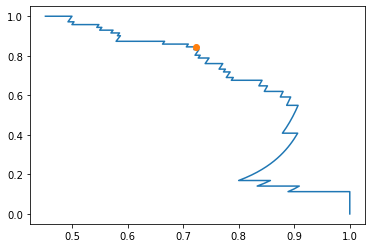

In [193]:
plt.plot(precision, recall)
plt.plot(precision[fscore.argmax()], recall[fscore.argmax()], marker = 'o')

### Checking scores at different thresolds for the model

In [194]:
import numpy as np

threshold = np.arange(0, 1.1, 0.1)
threshold

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [195]:
from sklearn.metrics import accuracy_score, f1_score

In [196]:
lr.fit(x_train, y_train)

# To check score on different thresholds
# lr.predict_proba(x_test)[:, 1] >= i).astype('int')

for i in threshold:
    print(confusion_matrix(y_test, (lr.predict_proba(x_test)[:, 1] >= i).astype('int')))

[[ 0 86]
 [ 0 71]]
[[15 71]
 [ 2 69]]
[[34 52]
 [ 5 66]]
[[53 33]
 [ 9 62]]
[[63 23]
 [12 59]]
[[73 13]
 [22 49]]
[[78  8]
 [26 45]]
[[82  4]
 [40 31]]
[[83  3]
 [50 21]]
[[84  2]
 [61 10]]
[[86  0]
 [71  0]]


## <span style = 'background: Pink'> XGboost model </span>

In [143]:
# pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [77]:
from xgboost import XGBClassifier

---
---

### <span style = 'background: Yellow'> Running different models with default parameters on the training set </span>

In [198]:
for i in [KNeighborsClassifier(), LogisticRegression(), RandomForestClassifier(), XGBClassifier()]:
    i.fit(x_train, y_train)
    y_pred = i.predict(x_test)
    print(f1_score(y_test, y_pred), i)

0.7432432432432432 KNeighborsClassifier()
0.7368421052631579 LogisticRegression()
0.8368794326241136 RandomForestClassifier()
0.8531468531468532 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


---
---

In [199]:
xgb = XGBClassifier()

In [200]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [201]:
y_pred = xgb.predict(x_test)

confusion_matrix(y_test, y_pred)

array([[75, 11],
       [10, 61]], dtype=int64)

### GridSearchCV on XGboost

In [203]:
%time
params = {'max_depth': [4, 5, 6, 7, 8],
         'learning_rate': [0.05, 0.01, 0.1],
         'gamma': [0, 0.25, 1],
         'reg_lambda': [0, 1, 10],
         'subsample': [0.5, 0.75, 1],
         'colsample_bytree': [0.5, 0.75, 1]}

ml(XGBClassifier(), 4, params)

Wall time: 0 ns


In [205]:
clf.cv_results_

{'mean_fit_time': array([0.14613926, 0.15789264, 0.17187357, ..., 0.19667161, 0.2154144 ,
        0.2214579 ]),
 'std_fit_time': array([1.10453081e-02, 3.94464478e-03, 4.25495346e-06, ...,
        7.41412642e-03, 7.13805886e-03, 7.47045050e-03]),
 'mean_score_time': array([0.00957698, 0.00390661, 0.01171941, ..., 0.01056319, 0.00781417,
        0.01031339]),
 'std_score_time': array([0.0065432 , 0.00676644, 0.0067662 , ..., 0.00638475, 0.00781417,
        0.0063817 ]),
 'param_colsample_bytree': masked_array(data=[0.5, 0.5, 0.5, ..., 1, 1, 1],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0, 0, 0, ..., 1, 1, 1],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.05, 0.05, 0.05, ..., 0.1, 0.1, 0.1],
              mask=[False, False, False, ..., False, False, False],
 

In [206]:
clf.best_params_

{'colsample_bytree': 1,
 'gamma': 0.25,
 'learning_rate': 0.1,
 'max_depth': 7,
 'reg_lambda': 1,
 'subsample': 1}

### <span style = 'background: Red'> Training final/best model from GridSearchCV </span>

In [83]:
xgb = XGBClassifier(max_depth = 7, colsample_bytree = 1, gamma = 0.25, learning_rate = 0.1, reg_lambda = 1, subsample = 1)

In [86]:
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[93, 16],
       [17, 72]], dtype=int64)

In [209]:
# xgb = XGBClassifier(max_depth = 7)
# xgb.fit(x_train, y_train)

# To check score on different thresholds
threshold = np.arange(0.1, 0.9, 0.1)

for i in threshold:
    print(f1_score(y_test, (xgb.predict_proba(x_test)[:, 1] >= i).astype('int')), i)

0.7745664739884394 0.1
0.8280254777070063 0.2
0.8476821192052981 0.30000000000000004
0.863013698630137 0.4
0.8591549295774648 0.5
0.8428571428571429 0.6
0.8059701492537313 0.7000000000000001
0.7936507936507936 0.8


# Saving model

In [87]:
import pickle

In [88]:
pickle_out = open("xgb.pkl", mode = 'wb')

In [89]:
pickle.dump(xgb, pickle_out)

In [90]:
pickle_out.close()

In [137]:
pickle_out = open("transformer.pkl", mode = 'wb')

In [138]:
pickle_out.dump(column_transformer, pickle_out)

AttributeError: '_io.BufferedWriter' object has no attribute 'dump'

In [139]:
pickle_out.close()